# Histology Tissue Classification Project (HTCP)

(C) K. Mader / U. Michelucci 2018-2019

# Overview
The dataset serves as a much more interesting MNIST or CIFAR10 problem for biologists by focusing on histology tiles from patients with colorectal cancer. In particular, the data has 8 different classes of tissue (but Cancer/Not Cancer can also be an interesting problem).

The dataset has been adapted for the course by K. Mader (kevin.mader@gmail.com), and is available on kaggle: https://goo.gl/26zj41

# Challenge
- Classify tiles correctly into one of the eight classes
- Which classes are most frequently confused?
- What features can be used (like texture, see scikit-image) to improve classification?
- How can these models be applied to the much larger 5000x5000 models? 
How can this be done efficiently?

# Acknowledgements
The dataset has been copied from Zenodo: https://zenodo.org/record/53169#.W6HwwP4zbOQ

made by: Kather, Jakob Nikolas; Zöllner, Frank Gerrit; Bianconi, Francesco; Melchers, 
    Susanne M; Schad, Lothar R; Gaiser, Timo; Marx, Alexander; Weis, Cleo-Aron

The copy here is to make it more accessible to Kaggle users and allow kernels 
providing basic analysis of the data

Content
This data set represents a collection of textures in histological images of 
human colorectal cancer. It contains two files:

    Kather_texture_2016_image_tiles_5000.zip": a zipped folder containing 5000 
    histological images of 150 * 150 px each (74 * 74 µm). Each image belongs 
    to exactly one of eight tissue categories (specified by the folder name). 
    
    Kather_texture_2016_larger_images_10.zip": a zipped folder containing 10 
    larger histological images of 5000 x 5000 px each. These images contain 
    more than one tissue type. Image format

All images are RGB, 0.495 µm per pixel, digitized with an Aperio ScanScope 
(Aperio/Leica biosystems), magnification 20x. Histological samples are fully 
anonymized images of formalin-fixed paraffin-embedded human colorectal 
adenocarcinomas (primary tumors) from our pathology archive (Institute of Pathology, 
University Medical Center Mannheim, Heidelberg University, Mannheim, Germany).

Additionally the files has been prepared to resemble the MNIST dataset, meaning that you will also find the following files

- HTCP_8_8_L - 
- HTCP_8_8_RGB -
- HTCP_28_28_L -
- HTCP_28_28_RGB - 
- HTCP_64_64_L

# Ethics statement
All experiments were approved by the institutional ethics board (medical ethics board II, University Medical Center Mannheim, Heidelberg University, Germany; approval 2015-868R-MA). The institutional ethics board waived the need for informed consent for this retrospective analysis of anonymized samples. All experiments were carried out in accordance with the approved guidelines and with the Declaration of Helsinki.

# More information / data usage
For more information, please refer to the following article. Please cite this article when using the data set.

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: Multi-class texture analysis in colorectal cancer histology (2016), Scientific Reports (in press)

# Contact
For questions, please contact: Dr. Jakob Nikolas Kather http://orcid.org/0000-0002-3730-5348 ResearcherID: D-4279-2015

# Download the data

The dataset is composed of two datasets:

- The small images that will be used to test the classification models
- The big microscope images (5000x5000)

The first dataset is quite small and can be found in the same github repository where you find this file. The second are much bigger (250 Mb and 700 Mb) and cannot be uploaded on github, so you can get them on  kaggle: https://goo.gl/hkRSke  

# Helper Functions

In [1]:
def plot_image(some_image):
    
    some_digit_image = some_image.values.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

In [2]:
def get_label_name(idx):
    
    if (idx == 1):
        return '(1) TUMOR'
    elif (idx == 2):
        return '(2) STROMA'
    elif (idx == 3):
        return '(3) COMPLEX'
    elif (idx == 4):
        return '(4) LYMPHO'
    elif (idx == 5):
        return '(5) DEBRIS'
    elif (idx == 6):
        return '(6) MUCOSA'
    elif (idx == 7):
        return '(7) ADIPOSE'
    elif (idx == 8):
        return '(8) EMPTY'

# Load the data

In [3]:
%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from random import randint

from skimage.io import imread #read images from files
import seaborn as sns

import tensorflow as tf

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers
import tensorflow.keras as keras

In [4]:
def guess_image_dim(in_shape):
    side_len = int(np.sqrt(in_shape))
    if np.abs(in_shape-side_len*side_len)<2:
        return (int(side_len), int(side_len))
    else:
        side_len = int(np.sqrt(in_shape/3))
        return (side_len, side_len, 3)
csv_dir = os.path.join('.', 'data')

In [5]:
all_files = sorted(glob(os.path.join(csv_dir, 'HTCP*.csv')), 
                   key=lambda x: os.stat(x).st_size)
all_df_dict = {os.path.splitext(os.path.basename(x))[0]: pd.read_csv(x) for x in all_files}
for c_key in all_df_dict.keys():
    print(c_key, 'vector length:',  
          all_df_dict[c_key].shape[1], '->', 
          guess_image_dim(all_df_dict[c_key].shape[1]))

HTCP_8_8_L vector length: 65 -> (8, 8)
HTCP_8_8_RGB vector length: 193 -> (8, 8, 3)
HTCP_28_28_L vector length: 785 -> (28, 28)
HTCP_28_28_RGB vector length: 2353 -> (28, 28, 3)
HTCP_64_64_L vector length: 4097 -> (64, 64)


In [6]:
all_files

['./data/HTCP_8_8_L.csv',
 './data/HTCP_8_8_RGB.csv',
 './data/HTCP_28_28_L.csv',
 './data/HTCP_28_28_RGB.csv',
 './data/HTCP_64_64_L.csv']

In [7]:
data = pd.read_csv('data/HTCP_28_28_L.csv')

Let's create an array with labels (not yet one-encoded) and one for the images.

In [8]:
labels = data['label']
data = data.drop(['label'], axis = 1)

Let's look at the first records of the dataframe

In [9]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,101,110,154,160,95,44,139,184,164,160,...,128,103,73,72,75,152,130,96,133,159
1,67,66,69,76,80,57,46,67,90,77,...,57,58,65,74,80,81,83,77,75,73
2,127,137,121,140,170,111,128,117,60,105,...,69,90,100,143,119,148,140,193,146,97
3,80,90,101,106,120,100,99,66,63,91,...,154,131,109,97,102,71,93,120,84,62
4,153,141,121,132,110,131,119,99,101,91,...,134,117,121,136,178,192,210,189,149,155


The datasets has 5000 images, each 28x28 in gray

In [10]:
data.shape

(5000, 784)

## Examples of each class

Let's plot an image of each class

In [11]:
labels.unique()

array([2, 5, 7, 6, 8, 1, 4, 3])

In [12]:
def get_random_element_with_label (data, lbls, lbl):
    tmp = lbls == lbl
    subset = data[tmp]
    return subset.iloc[randint(1,subset.shape[0])]

labels_overview = np.empty([10,784])
for i in range (1,9):
    img = get_random_element_with_label(data, labels, i)
    labels_overview[i,:] = img

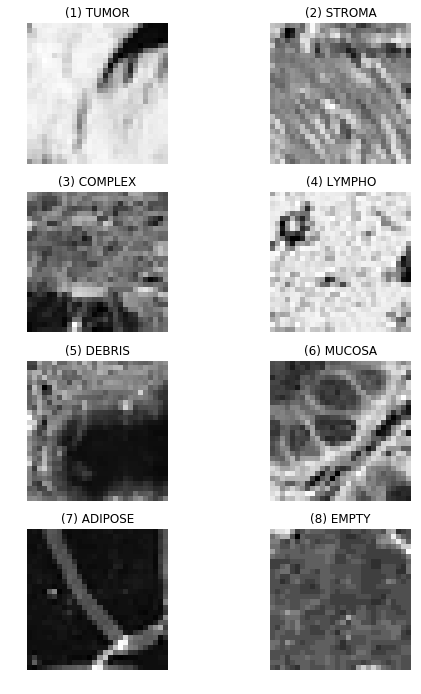

In [13]:
f = plt.figure(figsize=(8,15));
count = 1
for i in range(1,9):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.2)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[i,:].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

# Work with the original images

In [6]:
!ls data

HTCP_28_28_L.csv
HTCP_28_28_RGB.csv
HTCP_64_64_L.csv
HTCP_8_8_L.csv
HTCP_8_8_RGB.csv
Kather_texture_2016_image_tiles_5000
Kather_texture_2016_image_tiles_5000.zip
Kather_texture_2016_larger_images_10
Kather_texture_2016_larger_images_10.zip
hmnist_28_28_L.csv
hmnist_28_28_RGB.csv
hmnist_64_64_L.csv
hmnist_8_8_L.csv
hmnist_8_8_RGB.csv


In [22]:
!unzip data/Kather_texture_2016_image_tiles_5000.zip

Archive:  data/Kather_texture_2016_image_tiles_5000.zip
   creating: Kather_texture_2016_image_tiles_5000/01_TUMOR/
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10104_CRC-Prim-HE-10_021.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10142_CRC-Prim-HE-09_025.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/101A0_CRC-Prim-HE-03_034.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1021F_CRC-Prim-HE-04_029.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10264_CRC-Prim-HE-07_025.tif_Row_1801_Col_1.tif  
  inflating: K

  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/12933_CRC-Prim-HE-04_025.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1295D_CRC-Prim-HE-02_026.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/129DD_CRC-Prim-HE-09_011.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/129E_CRC-Prim-HE-09_010.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/129E9_CRC-Prim-HE-04_033.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/129FB_CRC-Prim-HE-07_023.tif_Row_601_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/12A0_CRC-Prim-HE-07_025.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/12AA9_CRC-Prim-HE-10_029.tif_Row_1_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/12C0F_CRC-Prim-HE-06_016.tif_Row_1_Col_451.tif  
  inflating: Kather_text

  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15B66_CRC-Prim-HE-03_009.tif_Row_601_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15B8C_CRC-Prim-HE-04_032.tif_Row_601_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15C75_CRC-Prim-HE-02_028.tif_Row_751_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15C75_CRC-Prim-HE-04_029.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15D84_CRC-Prim-HE-07_022.tif_Row_601_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15E06_CRC-Prim-HE-01_015.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15E1F_CRC-Prim-HE-05_013.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15E71_CRC-Prim-HE-09_011.tif_Row_301_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/15E98_CRC-Prim-HE-06_018.tif_Row_151_Col_1.tif  
  inflating: Kat

  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/183B4_CRC-Prim-HE-08_007.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/183D3_CRC-Prim-HE-09_026.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/18444_CRC-Prim-HE-08_007.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1851D_CRC-Prim-HE-05_016.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1852C_CRC-Prim-HE-03_028.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/18656_CRC-Prim-HE-01_002.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/18660_CRC-Prim-HE-03_021.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/195_CRC-Prim-HE-03_021.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1986_CRC-Prim-HE-02_028.tif_Row_151_Col_151.tif  
  inflating: Kather_texture

  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/38A7_CRC-Prim-HE-02_009.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/38D1_CRC-Prim-HE-04_014.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/38DD_CRC-Prim-HE-04_034.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/3928_CRC-Prim-HE-06_008.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/396E_CRC-Prim-HE-04_014.tif_Row_1_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/3A8D_CRC-Prim-HE-04_032.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/3BE6_CRC-Prim-HE-07_025.tif_Row_751_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/3BFF_CRC-Prim-HE-04_029.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/3CD6_CRC-Prim-HE-01_027.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_20

  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5B33_CRC-Prim-HE-07_022.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5B57_CRC-Prim-HE-08_010.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5B8C_CRC-Prim-HE-07.tif_Row_151_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5C70_CRC-Prim-HE-01_020.tif_Row_1_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5C9B_CRC-Prim-HE-04_014.tif_Row_1_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5CBC_CRC-Prim-HE-06_016.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5D31_CRC-Prim-HE-05_024.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5DBB_CRC-Prim-HE-07_025.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/5DBE_CRC-Prim-HE-01_044.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_

  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7BDE_CRC-Prim-HE-02_004b.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7C23_CRC-Prim-HE-05_005.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7C24_CRC-Prim-HE-01_011.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7C52_CRC-Prim-HE-09_014.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7C62_CRC-Prim-HE-02_026.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7C8E_CRC-Prim-HE-07_025.tif_Row_1351_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7D_CRC-Prim-HE-07_006.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7D33_CRC-Prim-HE-10_006.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/7DE0_CRC-Prim-HE-10_027.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_im

  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A409_CRC-Prim-HE-08_007.tif_Row_1351_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A55E_CRC-Prim-HE-04_014.tif_Row_1_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A570_CRC-Prim-HE-04_016.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A57D_CRC-Prim-HE-02_006.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A77A_CRC-Prim-HE-03_034.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A7DD_CRC-Prim-HE-03_009.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A7F1_CRC-Prim-HE-02_026.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A824_CRC-Prim-HE-04_032.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/A833_CRC-Prim-HE-07_025.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_20

  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/1079B_CRC-Prim-HE-04_013.tif_Row_1051_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/107A6_CRC-Prim-HE-03.tif_Row_1051_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/107BD_CRC-Prim-HE-02_015.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/107E_CRC-Prim-HE-07_026.tif_Row_901_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/107EE_CRC-Prim-HE-03_016.tif_Row_751_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/107F4_CRC-Prim-HE-04_013.tif_Row_901_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/10816_CRC-Prim-HE-01_028.tif_Row_301_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/10828_CRC-Prim-HE-04.tif_Row_301_Col_3451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/1082A_CRC-Prim-HE-09.tif_Row_451_Col_1501.tif  
  inflati

  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/1116_CRC-Prim-HE-03.tif_Row_1351_Col_1801.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11162_CRC-Prim-HE-06_002.tif_Row_301_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11165_CRC-Prim-HE-03_013.tif_Row_1801_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/111EB_CRC-Prim-HE-04_013.tif_Row_2551_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/111EC_CRC-Prim-HE-07_014.tif_Row_751_Col_3001.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/111EC_CRC-Prim-HE-09.tif_Row_601_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11210_CRC-Prim-HE-06_034.tif_Row_1201_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/1121E_CRC-Prim-HE-09.tif_Row_601_Col_2551.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11244_CRC-Prim-HE-07_014.tif_Row_601_Col_2401.tif  
  inf

  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11D3E_CRC-Prim-HE-03_016.tif_Row_1351_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11D49_CRC-Prim-HE-04_007.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11D5A_CRC-Prim-HE-03.tif_Row_1351_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11D6_CRC-Prim-HE-07_014.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11D64_CRC-Prim-HE-06_003.tif_Row_451_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11D89_CRC-Prim-HE-04.tif_Row_751_Col_2701.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11DC2_CRC-Prim-HE-03_013.tif_Row_1201_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11DD4_CRC-Prim-HE-04_013.tif_Row_1951_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/11E03_CRC-Prim-HE-01_018.tif_Row_751_Col_901.tif  
  inflatin

  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/12765_CRC-Prim-HE-09.tif_Row_901_Col_2551.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/12777_CRC-Prim-HE-03_030.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/1277C_CRC-Prim-HE-06_034.tif_Row_751_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/127B2_CRC-Prim-HE-03_008.tif_Row_301_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/127CC_CRC-Prim-HE-07_014.tif_Row_901_Col_2851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/127D4_CRC-Prim-HE-03.tif_Row_1801_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/127F5_CRC-Prim-HE-03_003.tif_Row_751_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/1288D_CRC-Prim-HE-02_015.tif_Row_451_Col_1651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/12895_CRC-Prim-HE-04.tif_Row_1651_Col_1051.tif  
  infl

  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13117_CRC-Prim-HE-10_019.tif_Row_601_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13151_CRC-Prim-HE-01_050.tif_Row_1051_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/131A7_CRC-Prim-HE-04.tif_Row_1801_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/131C4_CRC-Prim-HE-08_004.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/131E9_CRC-Prim-HE-10_019.tif_Row_301_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/1322D_CRC-Prim-HE-03_001.tif_Row_901_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/132B1_CRC-Prim-HE-04.tif_Row_1801_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/132BC_CRC-Prim-HE-05_009b.tif_Row_301_Col_1351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/132E3_CRC-Prim-HE-07_014.tif_Row_1051_Col_1051.tif  
 

  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13CF0_CRC-Prim-HE-06_034.tif_Row_901_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13D05_CRC-Prim-HE-01_012.tif_Row_1_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13D0B_CRC-Prim-HE-02_011.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13D20_CRC-Prim-HE-03_003.tif_Row_601_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13D24_CRC-Prim-HE-01_018.tif_Row_1_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13D47_CRC-Prim-HE-04.tif_Row_301_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13DBF_CRC-Prim-HE-06_003.tif_Row_751_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13DD1_CRC-Prim-HE-04.tif_Row_1201_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/02_STROMA/13DDC_CRC-Prim-HE-05_002b.tif_Row_1051_Col_451.tif  
  inflati

  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/105D0_CRC-Prim-HE-06_030.tif_Row_151_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/1066D_CRC-Prim-HE-10_004.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/1067F_CRC-Prim-HE-09_015.tif_Row_751_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/10681_CRC-Prim-HE-03_026.tif_Row_451_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/1068F_CRC-Prim-HE-07_004.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/10770_CRC-Prim-HE-03_002.tif_Row_451_Col_1651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/10794_CRC-Prim-HE-10_003.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/107BF_CRC-Prim-HE-06_030.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/1081C_CRC-Prim-HE-10_003.tif_Row_1_Col_1.tif  
  i

  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/12693_CRC-Prim-HE-06_011.tif_Row_1_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/12759_CRC-Prim-HE-10_009.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/1277_CRC-Prim-HE-08_006.tif_Row_1051_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/12776_CRC-Prim-HE-03_033.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/12784_CRC-Prim-HE-03_002.tif_Row_151_Col_1801.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/127F0_CRC-Prim-HE-05_009a.tif_Row_451_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/12833_CRC-Prim-HE-06_028.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/1284C_CRC-Prim-HE-03_002.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/12A2C_CRC-Prim-HE-06_031.tif_Row_1_Col_151.tif  
  

  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14CA6_CRC-Prim-HE-06_006.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14CF_CRC-Prim-HE-07_029.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14D11_CRC-Prim-HE-10_025.tif_Row_751_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14DEE_CRC-Prim-HE-07_017.tif_Row_301_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14E2B_CRC-Prim-HE-05_009a.tif_Row_751_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14E30_CRC-Prim-HE-06_011.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14E31_CRC-Prim-HE-06_019.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14E68_CRC-Prim-HE-03_033.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/14F1_CRC-Prim-HE-03_002.tif_Row_751_Col_601.tif  
  

  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17BB_CRC-Prim-HE-06_030.tif_Row_1_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17BC4_CRC-Prim-HE-02_006.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17BC7_CRC-Prim-HE-05_009a.tif_Row_751_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17BC9_CRC-Prim-HE-05_009a.tif_Row_151_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17BF4_CRC-Prim-HE-10_012.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17C1E_CRC-Prim-HE-05_002a.tif_Row_601_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17C2E_CRC-Prim-HE-10_009.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17C68_CRC-Prim-HE-02_006.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/17CC_CRC-Prim-HE-07_017.tif_Row_151_Col_451.tif

  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/3201_CRC-Prim-HE-05_019.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/32FA_CRC-Prim-HE-03_002.tif_Row_1_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/32FC_CRC-Prim-HE-10_025.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/339E_CRC-Prim-HE-06_011.tif_Row_151_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/3405_CRC-Prim-HE-01_037.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/34EC_CRC-Prim-HE-01_049.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/3541_CRC-Prim-HE-07_015.tif_Row_601_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/3643_CRC-Prim-HE-08_006.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/3689_CRC-Prim-HE-07_003.tif_Row_1_Col_451.tif  
  inflating: Kather_

  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/5389_CRC-Prim-HE-02_032.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/5429_CRC-Prim-HE-05_019.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/546F_CRC-Prim-HE-05_009a.tif_Row_601_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/547F_CRC-Prim-HE-06_007.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/549F_CRC-Prim-HE-03_002.tif_Row_451_Col_1951.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/54B8_CRC-Prim-HE-07_015.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/54C7_CRC-Prim-HE-05_002a.tif_Row_601_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/54D8_CRC-Prim-HE-01_034.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/54EE_CRC-Prim-HE-03_025.tif_Row_151_Col_901.tif  
  in

  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/77F2_CRC-Prim-HE-05_012.tif_Row_1_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/785D_CRC-Prim-HE-01_030.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/789D_CRC-Prim-HE-05_009a.tif_Row_451_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/78D7_CRC-Prim-HE-10_025.tif_Row_1201_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/78FC_CRC-Prim-HE-09_029.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/7903_CRC-Prim-HE-03_002.tif_Row_1201_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/7964_CRC-Prim-HE-09_015.tif_Row_451_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/7A28_CRC-Prim-HE-07_010.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/03_COMPLEX/7A68_CRC-Prim-HE-09_015.tif_Row_601_Col_451.tif  
  infl

  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/12537_CRC-Prim-HE-09_013.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/12573_CRC-Prim-HE-01_005.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/12598_CRC-Prim-HE-05_004.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/125B5_CRC-Prim-HE-01_006b.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/126D3_CRC-Prim-HE-01_013.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/127BF_CRC-Prim-HE-01_004.tif_Row_1051_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/1283D_CRC-Prim-HE-09_008.tif_Row_1_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/12860_CRC-Prim-HE-01_005.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/128B7_CRC-Prim-HE-02_copy.tif_Row_1_Col_151.tif  
  inf

  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/15C76_CRC-Prim-HE-01_005.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/15CCC_CRC-Prim-HE-02.tif_Row_601_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/15CF5_CRC-Prim-HE-05_023.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/15EA0_CRC-Prim-HE-01_013.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/15EA0_CRC-Prim-HE-01_013.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/15EBA_CRC-Prim-HE-01_004.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/15F60_CRC-Prim-HE-01_005.tif_Row_301_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/161BD_CRC-Prim-HE-05_023.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/161E4_CRC-Prim-HE-09_005.tif_Row_151_Col_151.tif  
  inflati

  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/27C1_CRC-Prim-HE-06.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/27F5_CRC-Prim-HE-01_004.tif_Row_301_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/2820_CRC-Prim-HE-02.tif_Row_301_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/289A_CRC-Prim-HE-01b.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/293A_CRC-Prim-HE-01_004.tif_Row_751_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/2954_CRC-Prim-HE-08_011.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/299B_CRC-Prim-HE-01_006b.tif_Row_1_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/2A03_CRC-Prim-HE-05_010.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/2A0B_CRC-Prim-HE-01_004.tif_Row_151_Col_901.tif  
  inflating: Kather_texture_20

  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/51B0_CRC-Prim-HE-05_010.tif_Row_601_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/51C0_CRC-Prim-HE-02.tif_Row_601_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/51FA_CRC-Prim-HE-10_011.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/5239_CRC-Prim-HE-05_003.tif_Row_151_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/5257_CRC-Prim-HE-01_005.tif_Row_301_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/5266_CRC-Prim-HE-02_copy.tif_Row_151_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/529B_CRC-Prim-HE-05_004.tif_Row_1_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/540E_CRC-Prim-HE-01_004.tif_Row_451_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/543C_CRC-Prim-HE-01_006b.tif_Row_151_Col_751.tif  
  inflating: Kat

  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7BD2_CRC-Prim-HE-05_004.tif_Row_1_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7BD4_CRC-Prim-HE-09_006.tif_Row_601_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7C4C_CRC-Prim-HE-01_004.tif_Row_451_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7C4E_CRC-Prim-HE-05_023.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7CAA_CRC-Prim-HE-10c.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7D2E_CRC-Prim-HE-05_022.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7E0F_CRC-Prim-HE-01_004.tif_Row_751_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/7EBC_CRC-Prim-HE-05_003.tif_Row_451_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/808F_CRC-Prim-HE-05_003.tif_Row_151_Col_601.tif  
  inflating: Kather

  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/B654_CRC-Prim-HE-01_002.tif_Row_301_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/B69A_CRC-Prim-HE-01_004.tif_Row_1051_Col_1351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/B6AC_CRC-Prim-HE-05_004.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/B7BA_CRC-Prim-HE-09_006.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/B7F8_CRC-Prim-HE-06.tif_Row_301_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/BA56_CRC-Prim-HE-01.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/BA7C_CRC-Prim-HE-02_copy.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/BD65_CRC-Prim-HE-10_011.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/BEEB_CRC-Prim-HE-09_020.tif_Row_151_Col_151.tif  
  inflating: Kather_t

  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F118_CRC-Prim-HE-05_003.tif_Row_301_Col_1801.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F158_CRC-Prim-HE-05_004.tif_Row_301_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F19C_CRC-Prim-HE-02.tif_Row_751_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F1B8_CRC-Prim-HE-05_003.tif_Row_451_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F245_CRC-Prim-HE-09_019.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F28_CRC-Prim-HE-01_005.tif_Row_451_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F389_CRC-Prim-HE-02.tif_Row_151_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F3A3_CRC-Prim-HE-01_001.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/04_LYMPHO/F3C1_CRC-Prim-HE-05_003.tif_Row_1_Col_1651.tif  
  inflating: Kather

  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/115A1_CRC-Prim-HE-03_010.tif_Row_451_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/11681_CRC-Prim-HE-09_002.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/116B8_CRC-Prim-HE-09_002.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/116E8_CRC-Prim-HE-07_002.tif_Row_151_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1171C_CRC-Prim-HE-03_014.tif_Row_1_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/117DD_CRC-Prim-HE-08_021.tif_Row_1_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/117E6_CRC-Prim-HE-08_021.tif_Row_151_Col_1351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/118D7_CRC-Prim-HE-07_002.tif_Row_451_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/11981_CRC-Prim-HE-10_017.tif_Row_301_Col_301.tif  
  in

  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1418B_CRC-Prim-HE-08_023.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1421_CRC-Prim-HE-05_031.tif_Row_1_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1427E_CRC-Prim-HE-07_002.tif_Row_1_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1429_CRC-Prim-HE-08_023.tif_Row_901_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/142DE_CRC-Prim-HE-05_031.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/14390_CRC-Prim-HE-04_002.tif_Row_901_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1451C_CRC-Prim-HE-04_002.tif_Row_301_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/14560_CRC-Prim-HE-04_002.tif_Row_151_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/14596_CRC-Prim-HE-04_030.tif_Row_1_Col_1.tif  
  inflating: K

  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/165E7_CRC-Prim-HE-08_023.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1662E_CRC-Prim-HE-03_024.tif_Row_601_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/16691_CRC-Prim-HE-03_014.tif_Row_151_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1672C_CRC-Prim-HE-08_023.tif_Row_1_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1674F_CRC-Prim-HE-07_002.tif_Row_151_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1688C_CRC-Prim-HE-08_023.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1695A_CRC-Prim-HE-09_003.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/16A79_CRC-Prim-HE-09_018.tif_Row_1_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/16AB9_CRC-Prim-HE-04_002.tif_Row_901_Col_601.tif  
  in

  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1C78_CRC-Prim-HE-05_031.tif_Row_151_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1D59_CRC-Prim-HE-07_002.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1DB2_CRC-Prim-HE-08_023.tif_Row_751_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1EA5_CRC-Prim-HE-03_010.tif_Row_301_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1EE4_CRC-Prim-HE-09_004.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1F4D_CRC-Prim-HE-05_031.tif_Row_151_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/1FE1_CRC-Prim-HE-04_002.tif_Row_601_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/2003_CRC-Prim-HE-04_001.tif_Row_451_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/2010_CRC-Prim-HE-09_002.tif_Row_1_Col_151.tif  
  inflating: 

  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/467D_CRC-Prim-HE-07_002.tif_Row_1201_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/4721_CRC-Prim-HE-03_010.tif_Row_151_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/476C_CRC-Prim-HE-04_010.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/477A_CRC-Prim-HE-03_010.tif_Row_451_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/4799_CRC-Prim-HE-08_024.tif_Row_1051_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/479C_CRC-Prim-HE-03_024.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/47A3_CRC-Prim-HE-08_024.tif_Row_1651_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/4887_CRC-Prim-HE-07_002.tif_Row_901_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/48AE_CRC-Prim-HE-04_004.tif_Row_1_Col_451.tif  
  inflati

  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6977_CRC-Prim-HE-01_024.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/69B2_CRC-Prim-HE-07_002.tif_Row_901_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6A2A_CRC-Prim-HE-08_021.tif_Row_301_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6A36_CRC-Prim-HE-08_021.tif_Row_451_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6A3C_CRC-Prim-HE-08_021.tif_Row_1501_Col_1651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6A3E_CRC-Prim-HE-04_030.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6A43_CRC-Prim-HE-07_002.tif_Row_1201_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6AE2_CRC-Prim-HE-07_002.tif_Row_601_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/6AE5_CRC-Prim-HE-08_021.tif_Row_601_Col_751.tif  
  inflating: 

  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/86C5_CRC-Prim-HE-04_002.tif_Row_301_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/8763_CRC-Prim-HE-08_021.tif_Row_601_Col_1351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/8795_CRC-Prim-HE-10_016.tif_Row_601_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/87C1_CRC-Prim-HE-08_021.tif_Row_901_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/88C6_CRC-Prim-HE-04_001.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/88E8_CRC-Prim-HE-08_021.tif_Row_1801_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/8934_CRC-Prim-HE-08_021.tif_Row_1_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/893C_CRC-Prim-HE-04_021.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/05_DEBRIS/8941_CRC-Prim-HE-03_031.tif_Row_901_Col_151.tif  
  inflatin

  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1184A_CRC-Prim-HE-06_001.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1184B_CRC-Prim-HE-07_001.tif_Row_301_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/11923_CRC-Prim-HE-06_032.tif_Row_1351_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/11975_CRC-Prim-HE-03_006.tif_Row_1501_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/11A02_CRC-Prim-HE-06_033.tif_Row_751_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/11A6B_CRC-Prim-HE-03_006.tif_Row_601_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/11B08_CRC-Prim-HE-05_001.tif_Row_1_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/11C03_CRC-Prim-HE-06_001.tif_Row_1501_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/11C84_CRC-Prim-HE-07_001.tif_Row_901_Col_1351.tif  


  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/130C1_CRC-Prim-HE-09_001.tif_Row_151_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/13109_CRC-Prim-HE-08_022.tif_Row_601_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1310E_CRC-Prim-HE-05_001.tif_Row_451_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/13115_CRC-Prim-HE-06_032.tif_Row_1051_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/13213_CRC-Prim-HE-05_030.tif_Row_451_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/13322_CRC-Prim-HE-03_006.tif_Row_1801_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/13399_CRC-Prim-HE-09_001.tif_Row_151_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/133C1_CRC-Prim-HE-08_025.tif_Row_1801_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/13417_CRC-Prim-HE-02_010.tif_Row_301_Col_451.tif

  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1505E_CRC-Prim-HE-07_001.tif_Row_301_Col_2701.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/150AD_CRC-Prim-HE-08_022.tif_Row_601_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/150CB_CRC-Prim-HE-08_022.tif_Row_151_Col_1951.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/150F7_CRC-Prim-HE-06_032.tif_Row_1351_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1510A_CRC-Prim-HE-07_001_copy.tif_Row_601_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/15147_CRC-Prim-HE-05.tif_Row_1201_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/15152_CRC-Prim-HE-05_030.tif_Row_1051_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1518D_CRC-Prim-HE-08_008.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/152_CRC-Prim-HE-03_007.tif_Row_1_Col_2101.tif  


  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1665A_CRC-Prim-HE-06_032.tif_Row_451_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/166A2_CRC-Prim-HE-07_001.tif_Row_901_Col_2551.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/166BD_CRC-Prim-HE-03_006.tif_Row_1351_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/166BE_CRC-Prim-HE-08_022.tif_Row_451_Col_1351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/16781_CRC-Prim-HE-09_001.tif_Row_1051_Col_1651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/167BB_CRC-Prim-HE-06_033.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/167BB_CRC-Prim-HE-09_001.tif_Row_1501_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/167D5_CRC-Prim-HE-08_022.tif_Row_1_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/1680C_CRC-Prim-HE-05.tif_Row_301_Col_1.tif  
  i

  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17D54_CRC-Prim-HE-05.tif_Row_2401_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17DD2_CRC-Prim-HE-08_022.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17DFA_CRC-Prim-HE-09_001.tif_Row_2401_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17E1E_CRC-Prim-HE-06_032.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17EE0_CRC-Prim-HE-07_001.tif_Row_901_Col_2701.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17F15_CRC-Prim-HE-07_001.tif_Row_301_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17F8E_CRC-Prim-HE-03_007.tif_Row_301_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17F9E_CRC-Prim-HE-06_035.tif_Row_751_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/17FA2_CRC-Prim-HE-08_022.tif_Row_751_Col_1201.tif  
  

  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2947_CRC-Prim-HE-03_006.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2960_CRC-Prim-HE-09_001.tif_Row_2401_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2A34_CRC-Prim-HE-05_030.tif_Row_1501_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2AC5_CRC-Prim-HE-08_022.tif_Row_451_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2AEA_CRC-Prim-HE-05.tif_Row_451_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2B82_CRC-Prim-HE-08_022.tif_Row_601_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2B9C_CRC-Prim-HE-05_011.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2BA7_CRC-Prim-HE-06_001.tif_Row_901_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/06_MUCOSA/2BBF_CRC-Prim-HE-06_001.tif_Row_301_Col_751.tif  
  inflating

  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/10808_CRC-Prim-HE-05_032.tif_Row_151_Col_4501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1081_CRC-Prim-HE-10_020.tif_Row_901_Col_3001.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/10828_CRC-Prim-HE-05_032.tif_Row_151_Col_1651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1085_CRC-Prim-HE-05_032.tif_Row_1501_Col_4051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/108C6_CRC-Prim-HE-06_004.tif_Row_1951_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/108E5_CRC-Prim-HE-05_032.tif_Row_451_Col_2401.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/108EA_CRC-Prim-HE-03_012.tif_Row_151_Col_1651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/10908_CRC-Prim-HE-03_012.tif_Row_2551_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1094A_CRC-Prim-HE-05_032.tif_Row_301_

  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/119B8_CRC-Prim-HE-05_032.tif_Row_1351_Col_4351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/119DA_CRC-Prim-HE-07.tif_Row_1051_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/119FF_CRC-Prim-HE-05_032.tif_Row_1351_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11A08_CRC-Prim-HE-03_012.tif_Row_3901_Col_2851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11A57_CRC-Prim-HE-05_032.tif_Row_151_Col_2101.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11A64_CRC-Prim-HE-06_004.tif_Row_2701_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11A6D_CRC-Prim-HE-06_004.tif_Row_1801_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11ADC_CRC-Prim-HE-05_032.tif_Row_1501_Col_4501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11B05_CRC-Prim-HE-06_004.tif_Row_30

  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12DB5_CRC-Prim-HE-06_004.tif_Row_1951_Col_2401.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12DBD_CRC-Prim-HE-03_012.tif_Row_1_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12DD_CRC-Prim-HE-05_032.tif_Row_901_Col_2851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12DF5_CRC-Prim-HE-05_032.tif_Row_451_Col_5101.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12DFB_CRC-Prim-HE-06_004.tif_Row_2101_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12E85_CRC-Prim-HE-05_032.tif_Row_601_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12EA2_CRC-Prim-HE-06_004.tif_Row_2851_Col_2401.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12EA9_CRC-Prim-HE-05_032.tif_Row_1801_Col_1351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/12EC3_CRC-Prim-HE-10_020.tif_Row_301_

  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/14020_CRC-Prim-HE-03_012.tif_Row_1951_Col_2251.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/14023_CRC-Prim-HE-03_012.tif_Row_3001_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/140C1_CRC-Prim-HE-10_020.tif_Row_151_Col_2851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/140CD_CRC-Prim-HE-06_004.tif_Row_1801_Col_1051.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/140F8_CRC-Prim-HE-03_012.tif_Row_3301_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/141_CRC-Prim-HE-06_004.tif_Row_2251_Col_2101.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/14111_CRC-Prim-HE-10_020.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1418A_CRC-Prim-HE-03_012.tif_Row_4201_Col_2401.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/141C4_CRC-Prim-HE-03_012.tif_Row_

  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/154D3_CRC-Prim-HE-03_012.tif_Row_1_Col_2551.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1550E_CRC-Prim-HE-06_004.tif_Row_1_Col_1801.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/15516_CRC-Prim-HE-05_032.tif_Row_1201_Col_3301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1555E_CRC-Prim-HE-03_012.tif_Row_2401_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1556_CRC-Prim-HE-05_032.tif_Row_1801_Col_4951.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/15570_CRC-Prim-HE-05_032.tif_Row_1_Col_3451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1559C_CRC-Prim-HE-03_012.tif_Row_601_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1560A_CRC-Prim-HE-03_012.tif_Row_1351_Col_2551.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/15661_CRC-Prim-HE-05_032.tif_Row_1951_Co

  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16927_CRC-Prim-HE-03_012.tif_Row_451_Col_1951.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16932_CRC-Prim-HE-10_020.tif_Row_901_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/1695C_CRC-Prim-HE-06_004.tif_Row_901_Col_2551.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16997_CRC-Prim-HE-03_012.tif_Row_3001_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16A19_CRC-Prim-HE-06_004.tif_Row_751_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16A20_CRC-Prim-HE-05_032.tif_Row_151_Col_3901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16A63_CRC-Prim-HE-07.tif_Row_1201_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16A75_CRC-Prim-HE-07.tif_Row_451_Col_2851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16AA4_CRC-Prim-HE-03_012.tif_Row_3901_Col_1351

  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/108CF_CRC-Prim-HE-06_005.tif_Row_4201_Col_3601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/108D1_CRC-Prim-HE-06_005.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/108F1_CRC-Prim-HE-06_005.tif_Row_4801_Col_2401.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/1091_CRC-Prim-HE-06_005.tif_Row_5851_Col_2401.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/1091D_CRC-Prim-HE-06_005.tif_Row_751_Col_1501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/10939_CRC-Prim-HE-06_005.tif_Row_3451_Col_7201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/10995_CRC-Prim-HE-06_005.tif_Row_4651_Col_2251.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/10997_CRC-Prim-HE-06_005.tif_Row_5251_Col_4501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/109BB_CRC-Prim-HE-06_005.tif_Row_5551_Col_6301.ti

  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/119E0_CRC-Prim-HE-06_005.tif_Row_3301_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11A2C_CRC-Prim-HE-06_005.tif_Row_4201_Col_2851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11A3D_CRC-Prim-HE-06_005.tif_Row_3901_Col_6601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11A54_CRC-Prim-HE-06_005.tif_Row_3751_Col_3451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11A6E_CRC-Prim-HE-06_005.tif_Row_6151_Col_3001.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11A85_CRC-Prim-HE-06_005.tif_Row_3151_Col_5701.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11AA2_CRC-Prim-HE-06_005.tif_Row_1051_Col_7501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11AB_CRC-Prim-HE-06_005.tif_Row_6151_Col_6451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/11B0F_CRC-Prim-HE-06_005.tif_Row_4051_Col_4201.

  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/130E5_CRC-Prim-HE-10_026.tif_Row_1801_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/130ED_CRC-Prim-HE-06_005.tif_Row_5701_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/130F4_CRC-Prim-HE-06_005.tif_Row_1501_Col_5851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/130FF_CRC-Prim-HE-06_005.tif_Row_4051_Col_3001.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/1310F_CRC-Prim-HE-06_005.tif_Row_3601_Col_6901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13139_CRC-Prim-HE-06_005.tif_Row_301_Col_6151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/1319C_CRC-Prim-HE-06_005.tif_Row_5401_Col_6151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/131DC_CRC-Prim-HE-06_005.tif_Row_2401_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/131DF_CRC-Prim-HE-06_005.tif_Row_1501_Col_6601.ti

  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13A43_CRC-Prim-HE-06_005.tif_Row_1501_Col_1801.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13A4B_CRC-Prim-HE-06_005.tif_Row_4801_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13A5B_CRC-Prim-HE-10_026.tif_Row_1651_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13A5C_CRC-Prim-HE-06_005.tif_Row_151_Col_6151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13A6E_CRC-Prim-HE-06_005.tif_Row_6301_Col_7801.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13AB6_CRC-Prim-HE-06_005.tif_Row_4051_Col_8101.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13AC8_CRC-Prim-HE-06_005.tif_Row_2551_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13AE2_CRC-Prim-HE-06_005.tif_Row_1201_Col_751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/13AF0_CRC-Prim-HE-06_005.tif_Row_1651_Col_1201.tif

  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/142E1_CRC-Prim-HE-10_026.tif_Row_3751_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/142FA_CRC-Prim-HE-06_005.tif_Row_2701_Col_1651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14333_CRC-Prim-HE-06_005.tif_Row_3001_Col_7951.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/1433D_CRC-Prim-HE-06_005.tif_Row_5551_Col_5851.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14358_CRC-Prim-HE-06_005.tif_Row_4201_Col_601.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14361_CRC-Prim-HE-06_005.tif_Row_901_Col_3751.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/1436C_CRC-Prim-HE-06_005.tif_Row_2551_Col_2101.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14375_CRC-Prim-HE-06_005.tif_Row_5701_Col_901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14392_CRC-Prim-HE-06_005.tif_Row_5551_Col_6751.ti

  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14DD3_CRC-Prim-HE-06_005.tif_Row_2101_Col_7501.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14DD6_CRC-Prim-HE-06_005.tif_Row_1951_Col_1801.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14E02_CRC-Prim-HE-06_005.tif_Row_601_Col_3901.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14E1_CRC-Prim-HE-06_005.tif_Row_1051_Col_4351.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14E30_CRC-Prim-HE-06_005.tif_Row_5101_Col_1201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14E37_CRC-Prim-HE-06_005.tif_Row_3301_Col_4651.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14E50_CRC-Prim-HE-06_005.tif_Row_751_Col_3151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14E69_CRC-Prim-HE-06_005.tif_Row_3901_Col_4201.tif  
  inflating: Kather_texture_2016_image_tiles_5000/08_EMPTY/14EA7_CRC-Prim-HE-06_005.tif_Row_4051_Col_7951.t

In [23]:
!unzip data/Kather_texture_2016_larger_images_10.zip

Archive:  data/Kather_texture_2016_larger_images_10.zip
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-01_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-02-APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-03_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-04_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-05_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-06_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-07_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-08_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-09_APPLICATION.tif  
  inflating: Kather_texture_2016_larger_images_10/CRC-Prim-HE-10_APPLICATION.tif  


Let's first load the images and their information (metadata)

In [7]:
base_tile_dir = os.path.join('data', 'kather_texture_2016_image_tiles_5000')
print(base_tile_dir)

tile_df = pd.DataFrame({
    'path': glob(os.path.join(base_tile_dir, '*', '*.tif'))
})

tile_df['file_id'] = tile_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
tile_df['cell_type'] = tile_df['path'].map(lambda x: os.path.basename(os.path.dirname(x))) 
tile_df['cell_type_idx'] = tile_df['cell_type'].map(lambda x: int(x.split('_')[0]))
tile_df['cell_type'] = tile_df['cell_type'].map(lambda x: x.split('_')[1])
tile_df['full_image_name'] = tile_df['file_id'].map(lambda x: x.split('_Row')[0])
tile_df['full_image_row'] = tile_df['file_id'].map(lambda x: int(x.split('_')[-3]))
tile_df['full_image_col'] = tile_df['file_id'].map(lambda x: int(x.split('_')[-1]))
#tile_df.sample(n=3)
tile_df.head(5)

data/kather_texture_2016_image_tiles_5000


,path,file_id,cell_type,cell_type_idx,full_image_name,full_image_row,full_image_col
0,data/kather_texture_2016_image_tiles_5000/02_S...,14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151,STROMA,2,14389_CRC-Prim-HE-07_026.tif,751,151
1,data/kather_texture_2016_image_tiles_5000/02_S...,1163A_CRC-Prim-HE-05_009b.tif_Row_751_Col_1201,STROMA,2,1163A_CRC-Prim-HE-05_009b.tif,751,1201
2,data/kather_texture_2016_image_tiles_5000/02_S...,118E_CRC-Prim-HE-02_015.tif_Row_301_Col_3601,STROMA,2,118E_CRC-Prim-HE-02_015.tif,301,3601
3,data/kather_texture_2016_image_tiles_5000/02_S...,12238_CRC-Prim-HE-09.tif_Row_151_Col_2551,STROMA,2,12238_CRC-Prim-HE-09.tif,151,2551
4,data/kather_texture_2016_image_tiles_5000/02_S...,100A6_CRC-Prim-HE-02_029.tif_Row_601_Col_301,STROMA,2,100A6_CRC-Prim-HE-02_029.tif,601,301


In [8]:
tile_df.describe(exclude=[np.number])

,path,file_id,cell_type,full_image_name
count,5000,5000,5000,5000
unique,5000,5000,8,4995
top,data/kather_texture_2016_image_tiles_5000/08_E...,15E3B_CRC-Prim-HE-08_005.tif_Row_751_Col_1,EMPTY,15EA0_CRC-Prim-HE-01_013.tif
freq,1,1,625,2


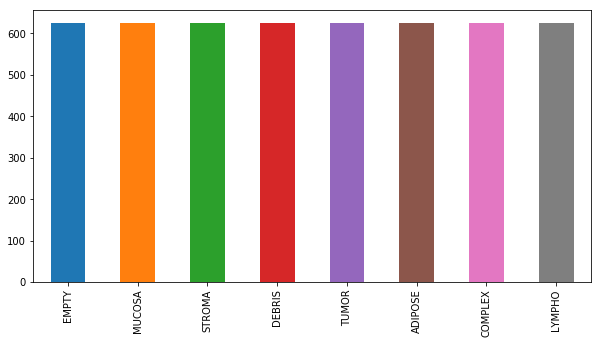

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

In [10]:
# load in all of the images
from skimage.io import imread
tile_df['image'] = tile_df['path'].map(imread)

In [11]:
tile_df.memory_usage()

Index                 80
path               40000
file_id            40000
cell_type          40000
cell_type_idx      40000
full_image_name    40000
full_image_row     40000
full_image_col     40000
image              40000
dtype: int64

In [ ]:
tile_df['path']

In [12]:
tile_df.columns

Index(['path', 'file_id', 'cell_type', 'cell_type_idx', 'full_image_name',
       'full_image_row', 'full_image_col', 'image'],
      dtype='object')

In [13]:
tile_df.head()

,path,file_id,cell_type,cell_type_idx,full_image_name,full_image_row,full_image_col,image
0,data/kather_texture_2016_image_tiles_5000/02_S...,14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151,STROMA,2,14389_CRC-Prim-HE-07_026.tif,751,151,"[[[132, 37, 75], [124, 37, 66], [121, 34, 63],..."
1,data/kather_texture_2016_image_tiles_5000/02_S...,1163A_CRC-Prim-HE-05_009b.tif_Row_751_Col_1201,STROMA,2,1163A_CRC-Prim-HE-05_009b.tif,751,1201,"[[[171, 91, 134], [175, 95, 138], [159, 84, 12..."
2,data/kather_texture_2016_image_tiles_5000/02_S...,118E_CRC-Prim-HE-02_015.tif_Row_301_Col_3601,STROMA,2,118E_CRC-Prim-HE-02_015.tif,301,3601,"[[[101, 66, 122], [75, 55, 108], [56, 36, 89],..."
3,data/kather_texture_2016_image_tiles_5000/02_S...,12238_CRC-Prim-HE-09.tif_Row_151_Col_2551,STROMA,2,12238_CRC-Prim-HE-09.tif,151,2551,"[[[183, 99, 149], [172, 88, 138], [161, 76, 13..."
4,data/kather_texture_2016_image_tiles_5000/02_S...,100A6_CRC-Prim-HE-02_029.tif_Row_601_Col_301,STROMA,2,100A6_CRC-Prim-HE-02_029.tif,601,301,"[[[126, 99, 132], [166, 139, 172], [206, 187, ..."


# Show a few in each category

__NOTE__: the images are here 150x150, so slightly bigger than the gray level ones, that are 28x28.

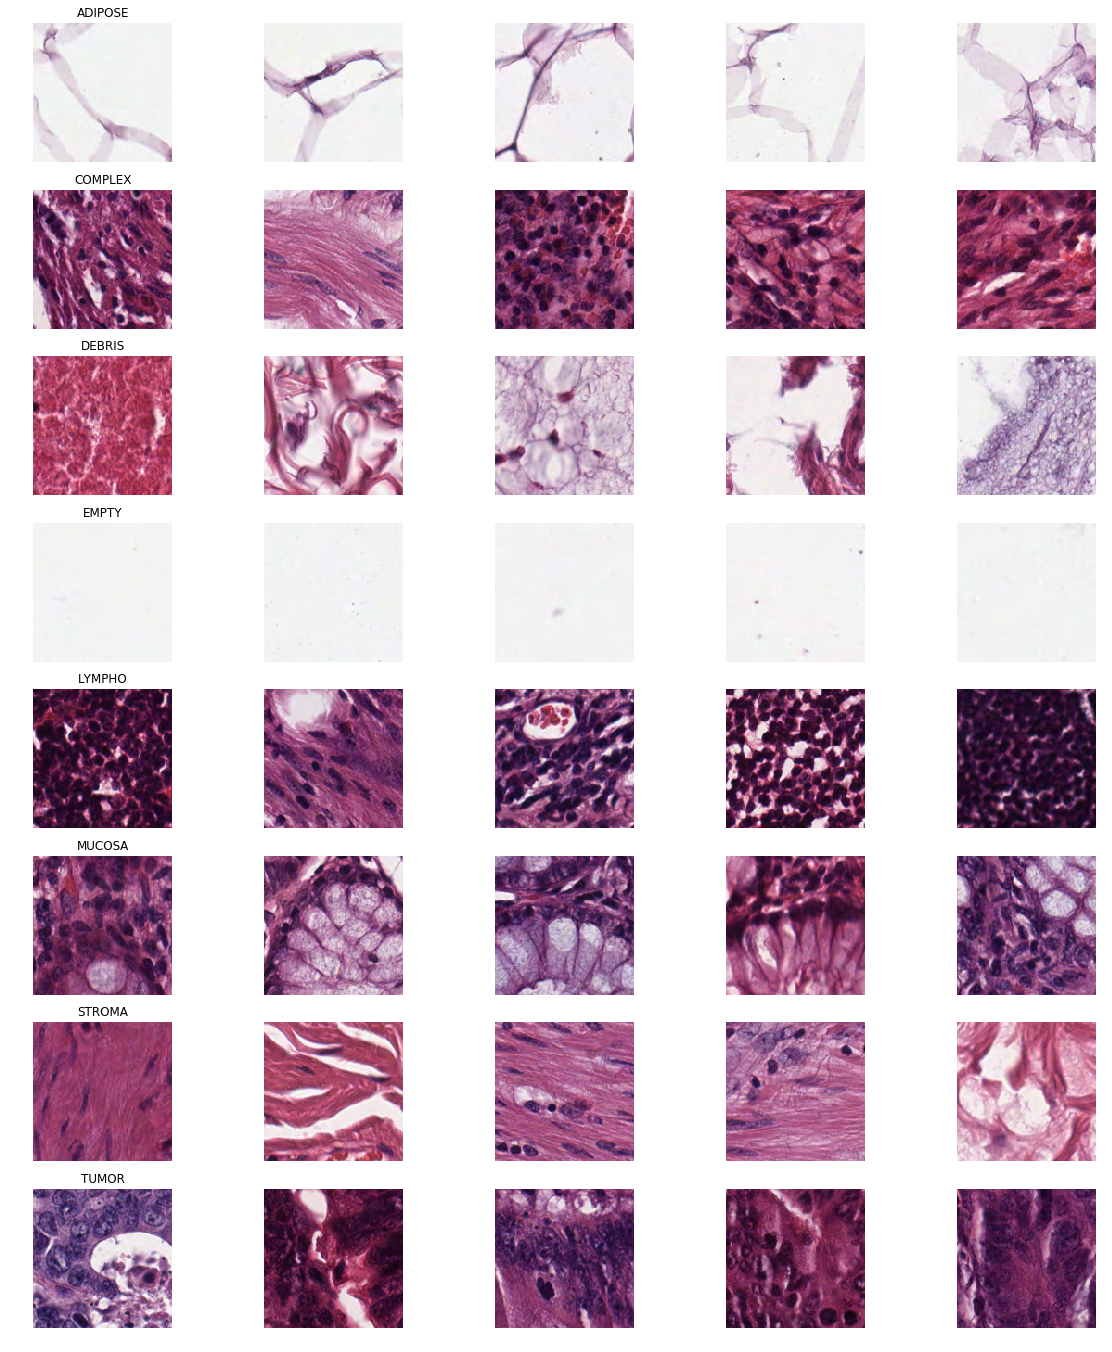

In [29]:
n_samples = 5
fig, m_axs = plt.subplots(8, n_samples, figsize = (4*n_samples, 3*8))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

# Load the 5000x5000 images

__NOTE__: keep in mind that each image is roughly 70 Mb, so if you want to try to identify the location of each type of tissue you can try loading one at a time.

In [30]:
base_tile_dir = os.path.join('data', 'Kather_texture_2016_larger_images_10')

big_image_df = pd.DataFrame({
    'path': glob(os.path.join(base_tile_dir,  '*.tif'))
})

print(big_image_df.iloc[0])

path    data/Kather_texture_2016_larger_images_10/CRC-...
Name: 0, dtype: object


In [31]:
big_image_df['image'] = big_image_df['path'].map(plt.imread)

In [32]:
big_image_df.head()

,path,image
0,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[153, 85, 132], [154, 92, 139], [153, 91, 13..."
1,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[71, 24, 68], [69, 18, 59], [74, 23, 64], [7..."
2,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[147, 110, 154], [150, 118, 167], [143, 111,..."
3,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[177, 124, 166], [189, 137, 176], [202, 150,..."
4,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[79, 20, 52], [62, 13, 42], [63, 14, 43], [6..."


the ```big_image_df``` has 10 images.

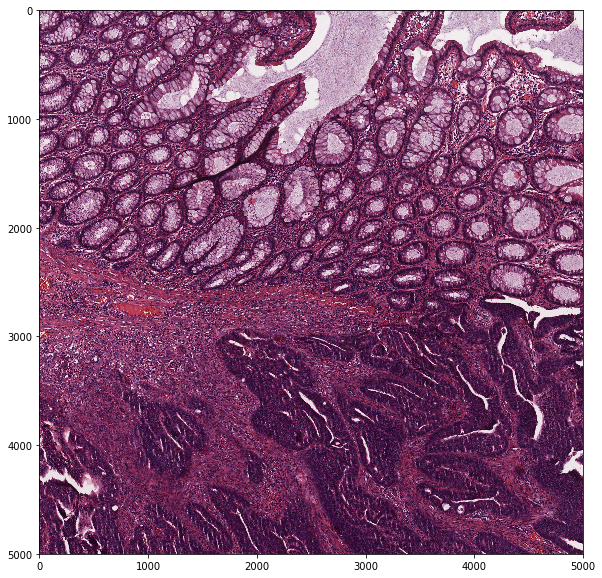

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(big_image_df['image'].iloc[0])
plt.show()

# Baseline models with 28x28 gray images

In [34]:
from sklearn.model_selection import train_test_split
sample_id_count = list(all_df_dict.values())[0].shape[0]
train_ids, test_ids = train_test_split(range(sample_id_count), 
                                       test_size=0.25, 
                                       random_state=2018)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_models(in_model_maker):
    fig, m_axs = plt.subplots(1, 5, figsize = (25, 5))
    for c_ax, c_key in zip(m_axs, all_df_dict.keys()):
        # c_key is for example HTCP_8_8_L (the file/type name)
        c_df = all_df_dict[c_key].copy()
        c_label = c_df.pop('label') # return column and drop from dataframe
        c_model = in_model_maker() # function of the model
        c_model.fit(c_df.iloc[train_ids, :], c_label.iloc[train_ids]) # fit of the model
        c_pred = c_model.predict(c_df.iloc[test_ids, :]) # prediction
        sns.heatmap(confusion_matrix(c_label.iloc[test_ids], c_pred), 
                    annot=True, cbar=False, fmt='d', ax=c_ax)
        c_ax.set_title(f'Accuracy: {accuracy_score(c_label[test_ids],c_pred)*100:2.2f}%\n{c_key}')

### Neireast neighbor

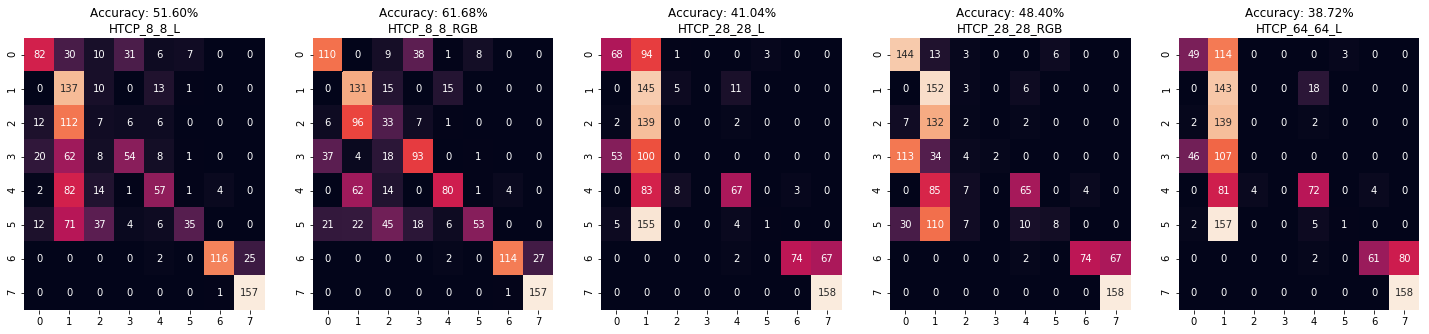

In [60]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_models(lambda : KNeighborsClassifier(n_jobs=4))

### Logistic regression

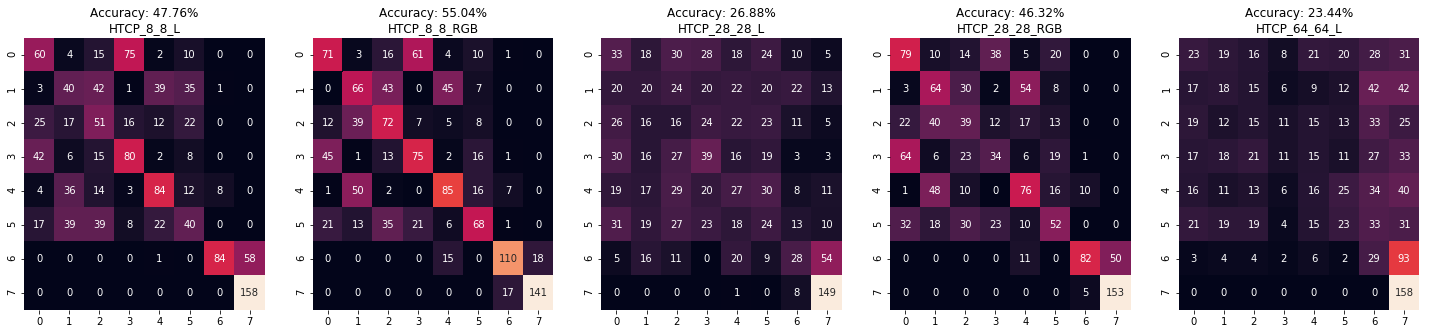

In [61]:
from sklearn.linear_model import LogisticRegression
evaluate_models(lambda : LogisticRegression(n_jobs=4, solver='newton-cg', max_iter=100, multi_class='auto'))

### Random Forest classifiert

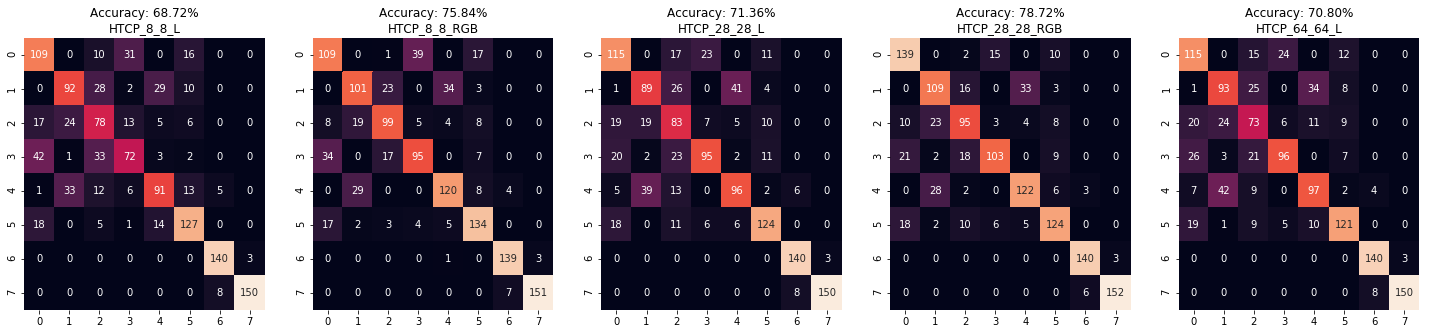

In [49]:
from sklearn.ensemble import RandomForestClassifier
evaluate_models(lambda : RandomForestClassifier(n_jobs=4, n_estimators=100))

# Example of a network with 4 layers, each with 10 neurons

In [50]:
class PrintProgress(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('Epoch', epoch)
        
class NBatchLogger(keras.callbacks.Callback):
    """
    A Logger that log average performance per `display` steps.
    """
    def __init__(self, display):
        self.step = 0
        self.display = display
        self.metric_cache = {}

    def on_batch_end(self, batch, logs={}):
        self.step += 1
        for k in self.params['metrics']:
            if k in logs:
                self.metric_cache[k] = self.metric_cache.get(k, 0) + logs[k]
        if self.step % self.display == 0:
            metrics_log = ''
            for (k, v) in self.metric_cache.items():
                val = v / self.display
                if abs(val) > 1e-3:
                    metrics_log += ' - %s: %.4f' % (k, val)
                else:
                    metrics_log += ' - %s: %.4e' % (k, val)
            print('step: {}/{} ... {}'.format(self.step,
                                          self.params['steps'],
                                          metrics_log))
            self.metric_cache.clear()

tf.keras.backend.clear_session()

In [51]:
c_df = all_df_dict['HTCP_28_28_L'].copy()
c_label = c_df.pop('label')

In [52]:
X_train = c_df.iloc[train_ids, :]
y_train = c_label.iloc[train_ids]-1

X_test = c_df.iloc[test_ids, :]
ytest = c_label.iloc[test_ids]-1

In [53]:
X_train.shape

(3750, 784)

In [54]:
# convert class vectors to binary class matrices One Hot Encoding
num_of_classes = 8
y_train = keras.utils.to_categorical(y_train, num_of_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.1, random_state=42)

X_train = X_train / 255.0 / 100.0
X_val = X_val / 255.0 / 100.0

In [55]:
n = 15
# Network building Phase
model = tf.keras.Sequential()
model.add(layers.Dense(n, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.train.AdamOptimizer(0.01),
              metrics=['accuracy'])
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
__________

In [56]:
out_batch = NBatchLogger(display=1000)
model.fit(X_train, Y_train, epochs=1000, batch_size=250,verbose = 0,
             callbacks=[out_batch])

step: 1000/None ...  - loss: 1.4105 - acc: 0.3694
step: 2000/None ...  - loss: 1.3284 - acc: 0.4017
step: 3000/None ...  - loss: 1.3096 - acc: 0.4104
step: 4000/None ...  - loss: 1.2981 - acc: 0.4142
step: 5000/None ...  - loss: 1.2855 - acc: 0.4202
step: 6000/None ...  - loss: 1.2747 - acc: 0.4233
step: 7000/None ...  - loss: 1.2673 - acc: 0.4237
step: 8000/None ...  - loss: 1.2596 - acc: 0.4258
step: 9000/None ...  - loss: 1.2476 - acc: 0.4304
step: 10000/None ...  - loss: 1.2438 - acc: 0.4298
step: 11000/None ...  - loss: 1.2377 - acc: 0.4307
step: 12000/None ...  - loss: 1.2344 - acc: 0.4330
step: 13000/None ...  - loss: 1.2284 - acc: 0.4349
step: 14000/None ...  - loss: 1.2288 - acc: 0.4344


In [57]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=1)
pred = model.predict_classes(X_val)
pred_train = model.predict_classes(X_train)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

375/375 [==============================] - 0s 698us/step
Final loss: 1.478533, final accuracy: 0.274667


# Confusion Matrix for training

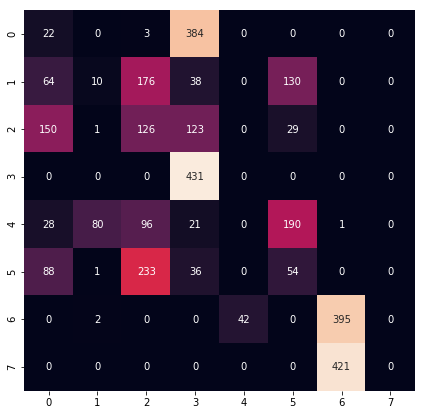

In [58]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_train, axis = 1), pred_train), 
                    annot=True, cbar=False, fmt='d', ax=ax)

# Confusion Matrix for dev

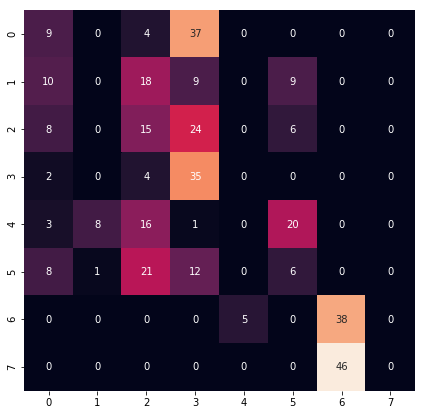

In [59]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_val, axis = 1), pred), 
                    annot=True, cbar=False, fmt='d', ax=ax)